In [1]:
import warnings
import scanpy as sc
import squidpy as sq
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import scanorama
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

## Load Files

In [2]:
dir_path = '../results/filtered_samples/concated/'

In [3]:
os.listdir(dir_path)

['chimp.h5ad', 'human.h5ad', 'macaque.h5ad', 'spatial_libd_human.h5ad']

In [18]:
files = os.listdir(dir_path)
adata_dict = {file[:-5]:sc.read_h5ad(dir_path + file) for file in files}
for key in adata_dict.keys():
    adata_dict[key].obs['condition'] = key
adata_dict

{'chimp': AnnData object with n_obs × n_vars = 19571 × 25080
     obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'condition'
     var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
     uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors'
     obsm: 'spatial',
 'human': AnnData object with n_obs × n_vars = 15417 × 19966
     obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'condition'
     var: 'gene_ids', 'feature_types', 'mt', 'hb', 'ribo'
     uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_pct_counts_ribo_colors', 'qc_total_counts_colors', 's

## Spot level

### Human

In [5]:
adata = adata_dict['human'].copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:02:44)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


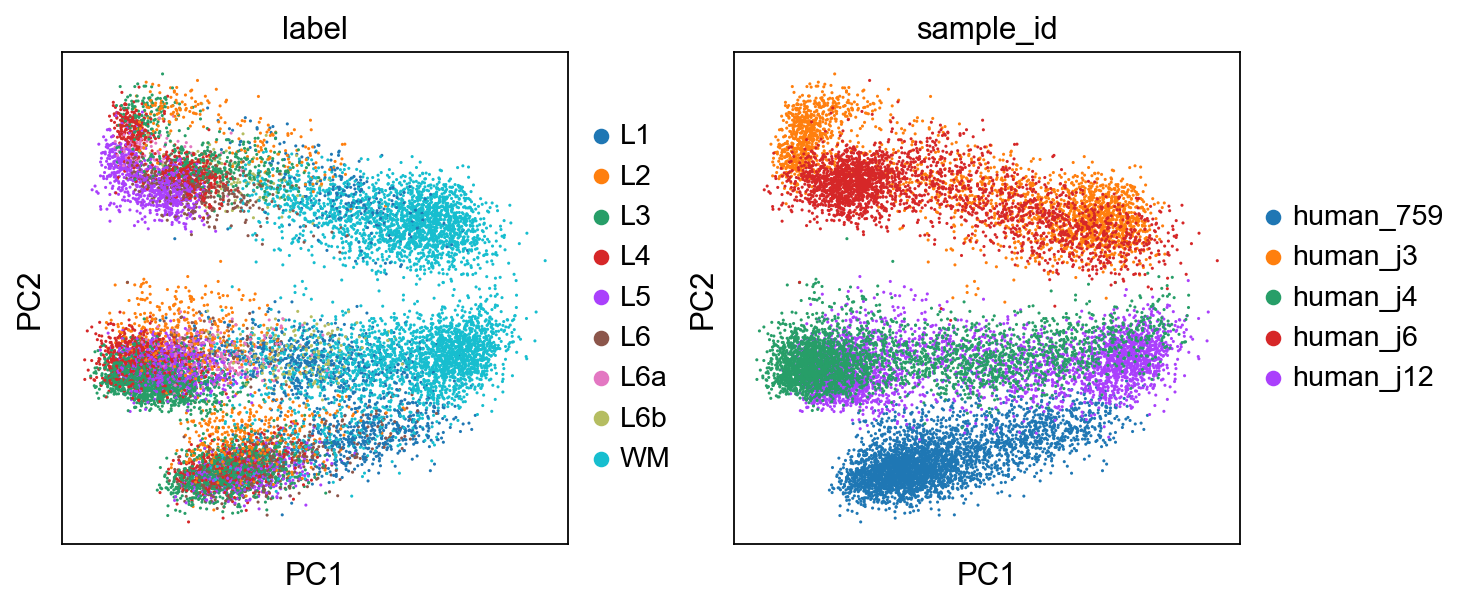

In [6]:
sc.pl.pca(adata, color=['label', 'sample_id'], ncols=2, show=True, save='pca_human.pdf')

### Chimp

In [7]:
adata = adata_dict['chimp'].copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)

normalizing counts per cell


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:02:26)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


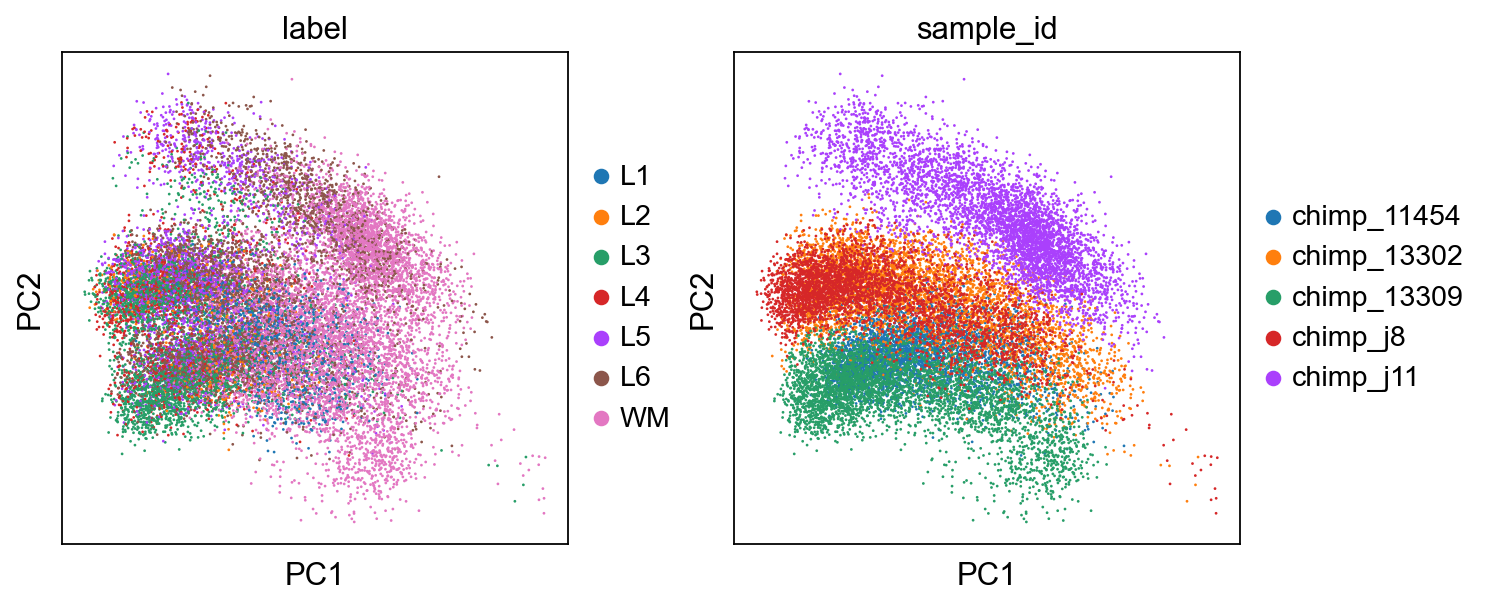

In [8]:
sc.pl.pca(adata, color=['label', 'sample_id'], ncols=2, show=True, save='pca_chimp.pdf')

### Macaque

In [9]:
adata = adata_dict['macaque'].copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)

normalizing counts per cell


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:02:19)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


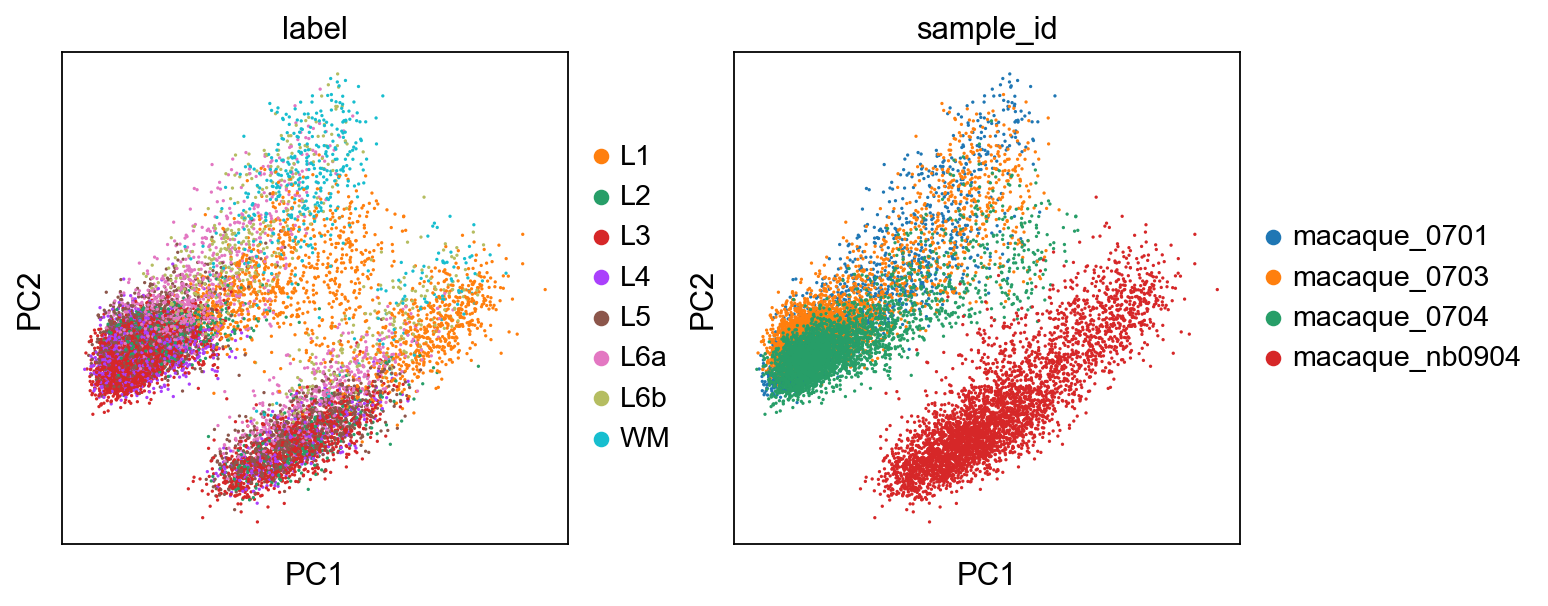

In [10]:
sc.pl.pca(adata, color=['label', 'sample_id'], ncols=2, show=True, save='pca_macaque.pdf')

### Mammals together

In [19]:
adata = an.concat([adata_dict['human'], adata_dict['chimp'], adata_dict['macaque']], merge='same',uns_merge="unique")
adata.obs_names_make_unique()
adata

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 48518 × 15585
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'condition'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'upper_part_L1_colors', 'label_colors'
    obsm: 'spatial'

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:02:47)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


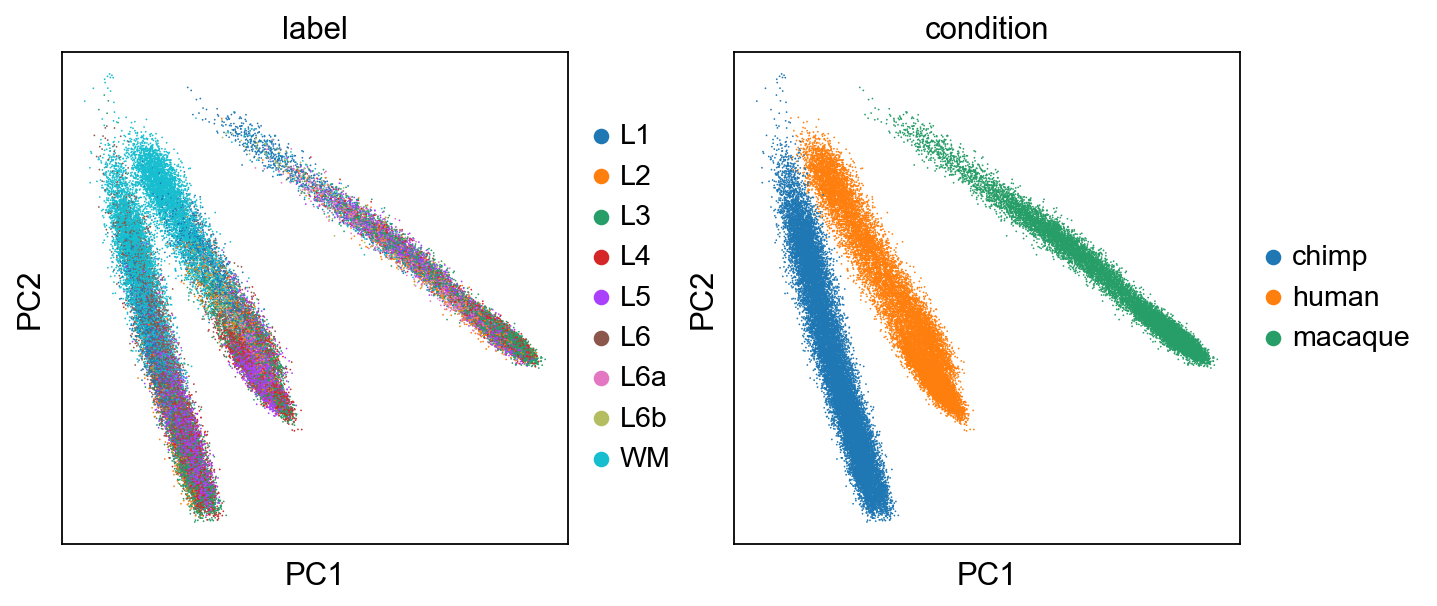

In [22]:
sc.pl.pca(adata, color=['label', 'condition'], ncols=2, show=True, save='pca_mamm.pdf')

### Age diffs

In [23]:
adata = an.concat([adata_dict['human'], adata_dict['spatial_libd_human']], merge='same',uns_merge="unique")
adata.obs_names_make_unique()
adata

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 58005 × 19404
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'condition'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'qc_good_spots_colors', 'qc_n_genes_by_counts_colors', 'qc_total_counts_colors', 'spatial', 'qc_pct_counts_mt_colors'
    obsm: 'spatial'

In [24]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:03:11)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


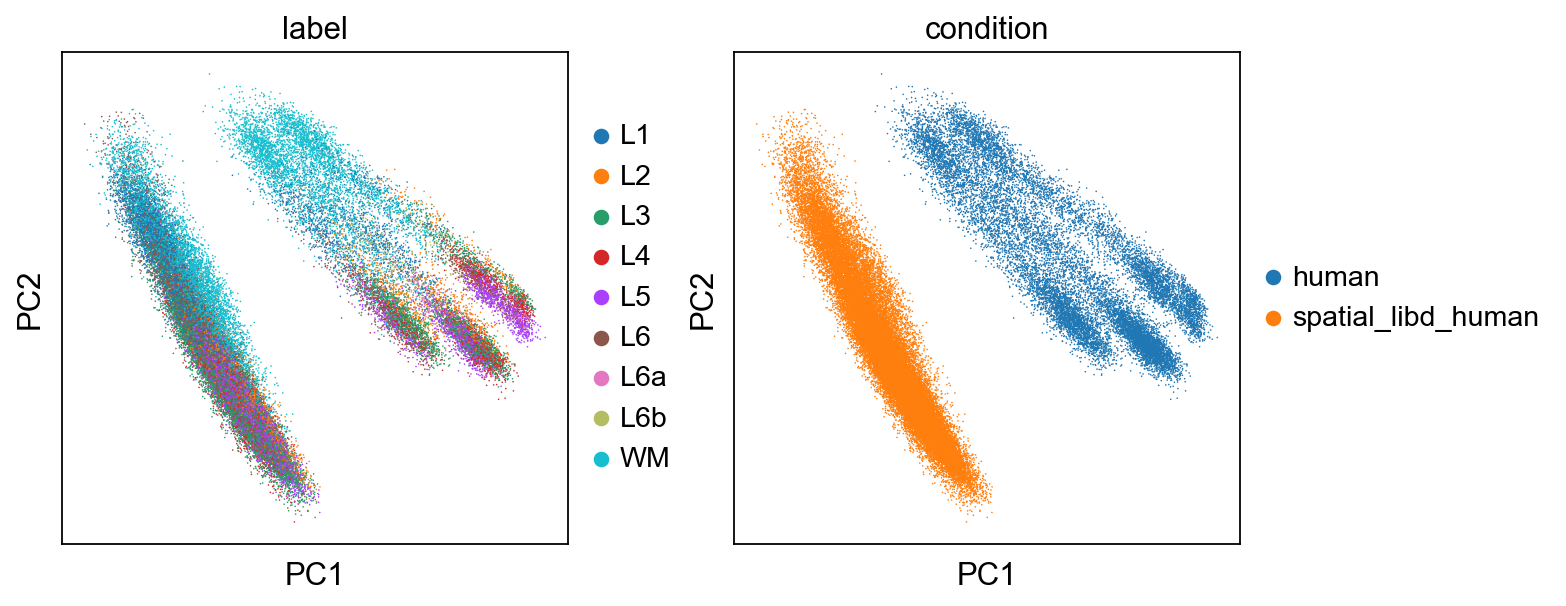

In [25]:
sc.pl.pca(adata, color=['label', 'condition'], ncols=2, show=True, save='pca_age.pdf')

In [26]:
del adata
del adata_dict

## Pseudobulk

### Load pseudobulks

In [28]:
from tqdm.notebook import tqdm

dir_path = '../results/DiffExpr/pseudobulks/'
conditions = ['human', 'spatial_libd_human', 'chimp', 'macaque']

adata_dict = dict()
expr_sum_dict = dict()
expr_mean_dict = dict()
ann_dict = dict()

for condition in tqdm(conditions):
    expr_sum_dict[condition] = pd.read_csv(dir_path + f'expression_sum_{condition}.csv', index_col=0)
    expr_mean_dict[condition] = pd.read_csv(dir_path + f'expression_mean_{condition}.csv', index_col=0)
    ann_dict[condition] = pd.read_csv(dir_path + f'annotation_{condition}.csv', index_col=0)
    
    adata_mean = an.AnnData(expr_mean_dict[condition].T)
    adata_mean.obs = ann_dict[condition]
    adata_dict[condition] = adata_mean

  0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
adata_pb_dict = dict()
mamm_cond = ['human', 'chimp', 'macaque']
age_cond = ['human', 'spatial_libd_human']

# млекопитающие
adata_pb_dict[f'mamm'] = an.concat([adata_dict[cond] for cond in mamm_cond], merge='same')
# человеки
adata_pb_dict[f'age'] = an.concat([adata_dict[cond] for cond in age_cond], merge='same')

### Conditions

  0%|          | 0/4 [00:00<?, ?it/s]

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=34
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=30
    finished (0:00:00)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=27
    finished (0:00:00)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


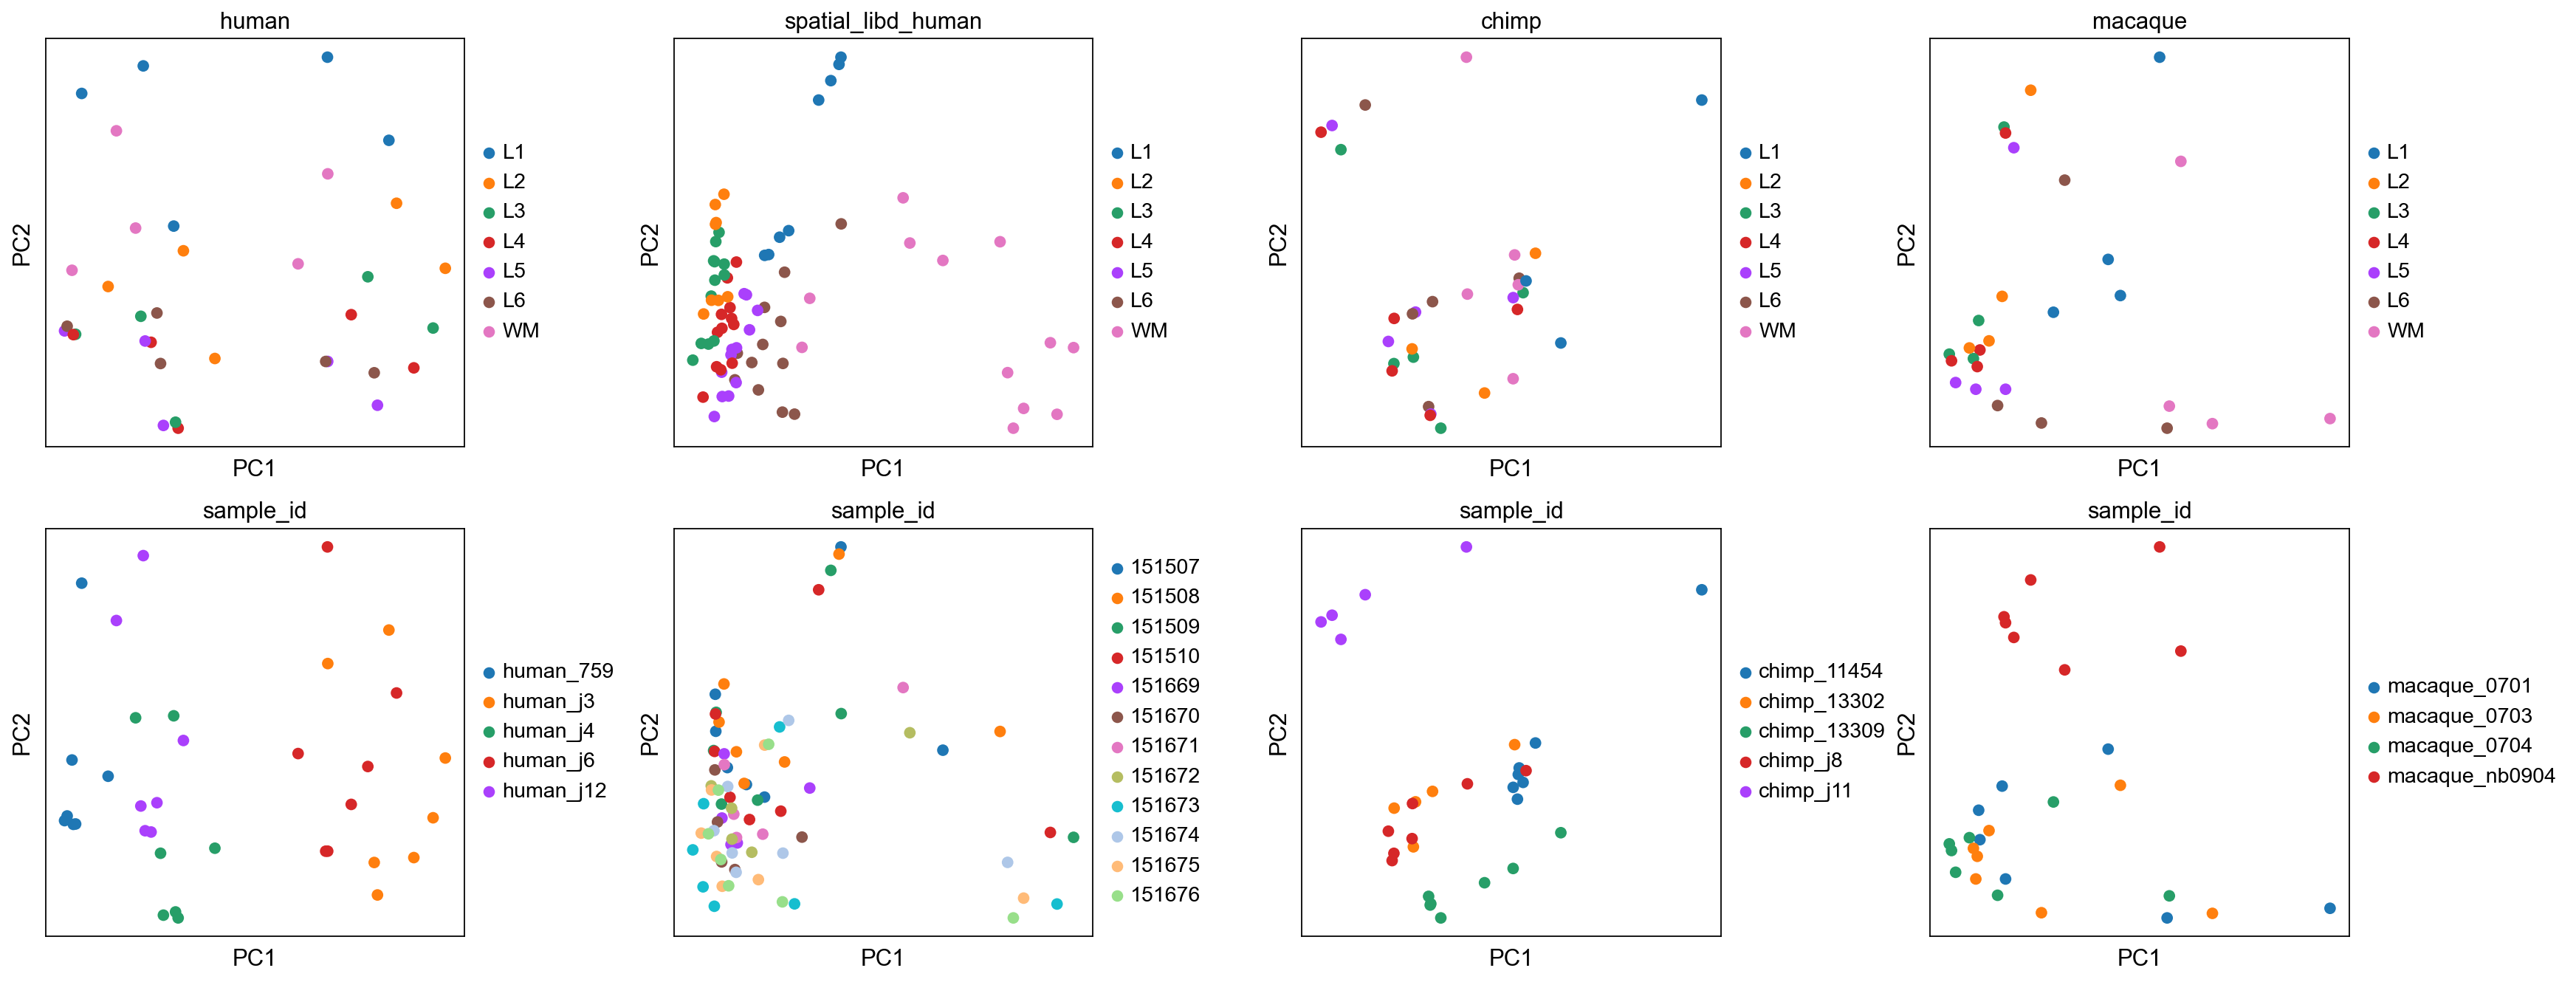

In [40]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10), gridspec_kw={'wspace':0.5})

for i, condition in enumerate(tqdm(conditions)):
    # load data
    adata = adata_dict[condition].copy()
    adata.obs['sample_id'] = adata.obs['sample_id'].astype(str)
    # calculate lib size
    adata.obs["lib_size"] = adata.X.sum(axis=1)
    # normalize and calculate pca
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.pca(adata)
    # plot pca
    sc.pl.pca(adata, color=['layer'], size=200, ax=ax[0][i], show=False, title=condition)
    sc.pl.pca(adata, color=['sample_id'], size=200, ax=ax[1][i], show=False)
plt.savefig("figures/conditions_pb.pdf", bbox_inches='tight')

### Mammals

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


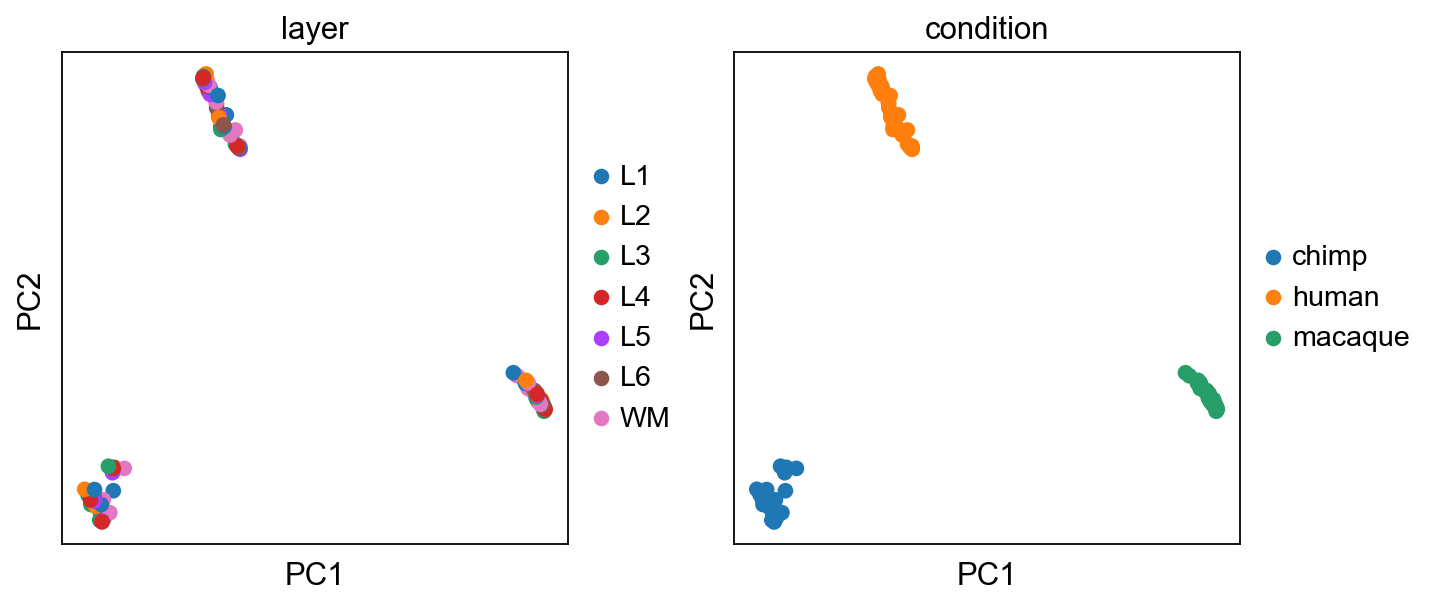

In [32]:
adata_pb = adata_pb_dict['mamm'].copy()
adata_pb.raw = adata_pb

adata_pb.obs["lib_size"] = adata_pb.X.sum(axis=1)
adata_pb.obs["log_lib_size"] = np.log(adata_pb.obs["lib_size"])
adata_pb.obs.sample_id = adata_pb.obs.sample_id.astype(str)

sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)
sc.pp.pca(adata_pb)

sc.pl.pca(adata_pb, color=['layer', 'condition'], size=200, ncols=2, save='pca_mamm_pb.pdf')

### Age diffs

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


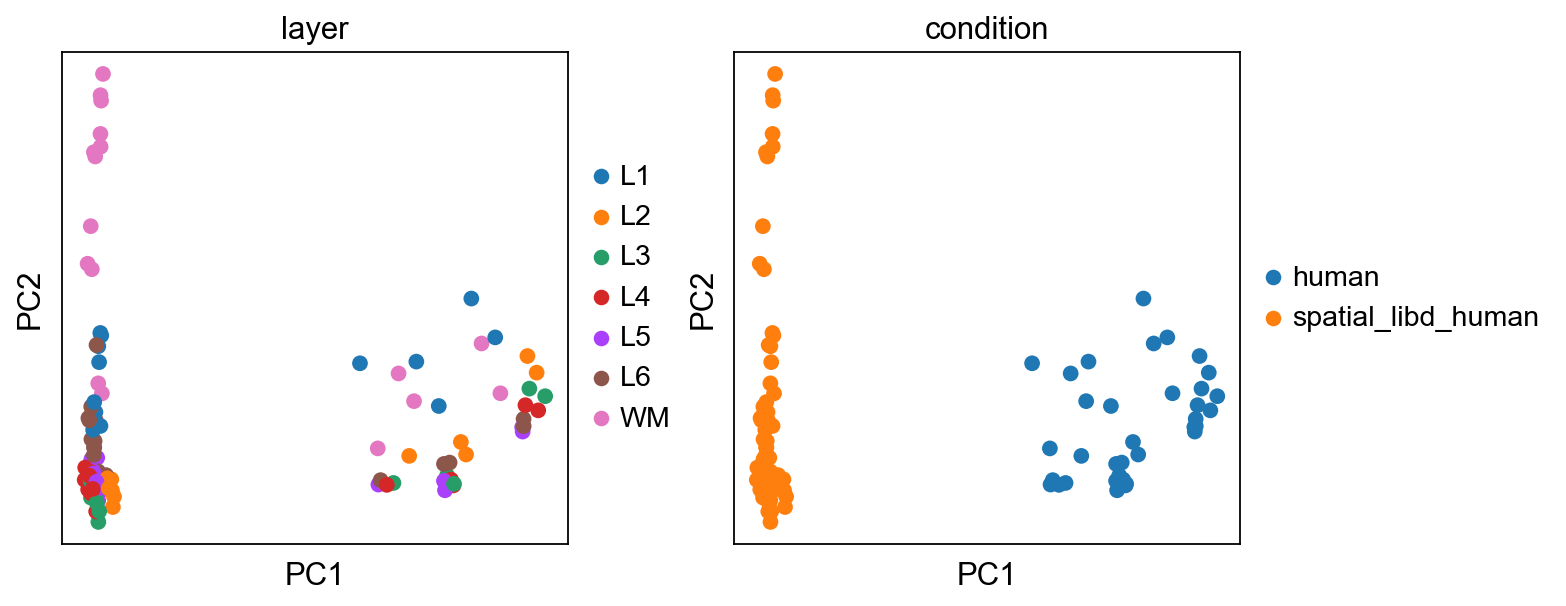

In [33]:
adata_pb = adata_pb_dict['age'].copy()
adata_pb.raw = adata_pb

adata_pb.obs["lib_size"] = adata_pb.X.sum(axis=1)
adata_pb.obs["log_lib_size"] = np.log(adata_pb.obs["lib_size"])
adata_pb.obs.sample_id = adata_pb.obs.sample_id.astype(str)

sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)
sc.pp.pca(adata_pb)

sc.pl.pca(adata_pb, color=['layer', 'condition'], size=200, ncols=2, save='pca_age_pb.pdf')

## Sample normalized pseudobulk

In [42]:
dir_path = '../results/DiffExpr/pseudobulks/'

### Mammal

In [43]:
file_name = 'pb_mamm_sample_norm.h5ad'
adata_pb = sc.read_h5ad(dir_path + file_name)
adata_pb

AnnData object with n_obs × n_vars = 94 × 15585
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


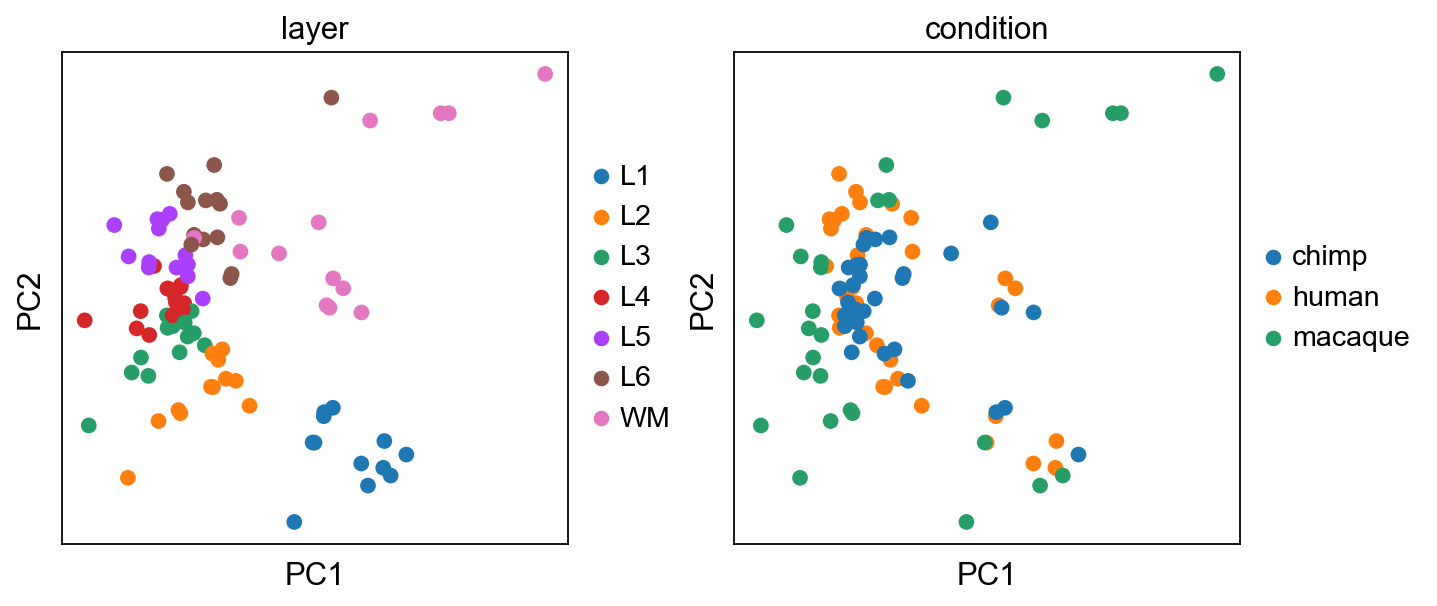

In [46]:
sc.pl.pca(adata_pb, color=['layer', 'condition'], size=200, ncols=3, save='pca_mamm_pb_norm.pdf')

### Age diffs

In [47]:
file_name = 'pb_age_sample_norm.h5ad'
adata_pb = sc.read_h5ad(dir_path + file_name)
adata_pb

AnnData object with n_obs × n_vars = 111 × 19404
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


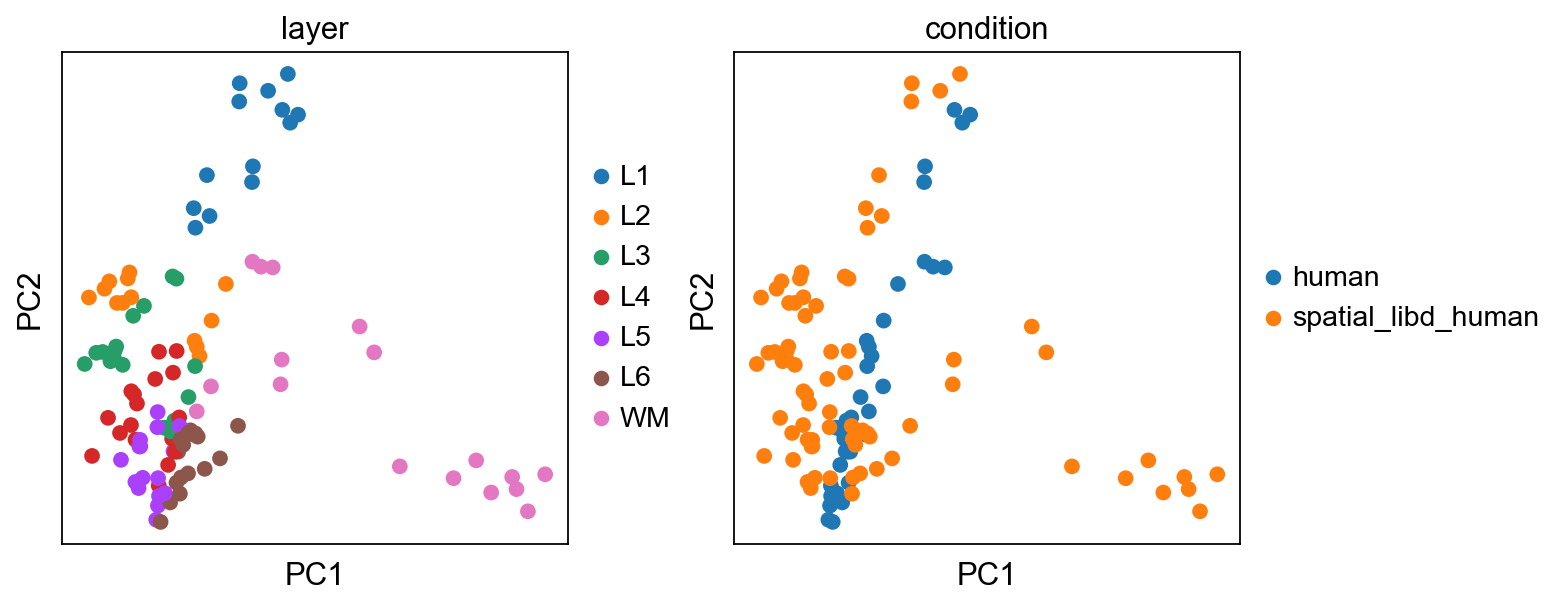

In [48]:
sc.pl.pca(adata_pb, color=['layer', 'condition'], size=200, ncols=3, save='pca_age_pb_norm.pdf')